In [47]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt     
from collections import Counter     # for majority voting in knn

In [ ]:
file_path = r"C:\Users\shara\OneDrive\Desktop\ML ACTS\ML-Projects\KNN from numpy scratch\Iris.csv"
df = pd.read_csv(file_path)
print(df.head())
print(df.tail())
print(df.describe())

print("\n\nMissing values\n", df.isnull().sum())

SyntaxError: invalid syntax (1608148699.py, line 1)

In [39]:
# Separate features and target 
X = df.iloc[:, :-1].values   # all columns except label
y = df.iloc[:, -1].values   # label only

In [40]:
# Custom train-test split function
def train_test_split_stratified(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    classes = np.unique(y)
    train_idx, test_idx = [], []
    for c in classes:
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * test_size)
        test_idx.extend(idx[:split])
        train_idx.extend(idx[split:])
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_stratified(X, y)

In [44]:
# Standardization
def standardize_train_test(X_train, X_test):
    mean = np.nanmean(X_train, axis=0)
    std  = np.nanstd(X_train, axis=0)

    # Handle zero OR NaN std
    std[(std == 0) | np.isnan(std)] = 1

    return (X_train - mean) / std, (X_test - mean) / std

X_train, X_test = standardize_train_test(X_train, X_test)  #feature scaling


ZeroDivisionError: division by zero

In [ ]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))   # Distance formula

In [ ]:
# KNN Class (from scratch)
class KNN:
    def __init__(self, k=3):
        self.k = k                          # Number of neighbors

    def fit(self, X, y):
        self.X_train = X                   # Store training features
        self.y_train = y                   # Store training labels
    def predict(self, X):
        return np.array([self._predict(x) for x in X])  # Predict for each sample
    def _predict(self, x):
        distances = [dist(x, x_train) for x_train in self.X_train] # Compute distance from test point to all training points
        k_indices = np.argsort(distances)[:self.k] # Get indices of K nearest neighbors
        k_labels = [self.y_train[i] for i in k_indices]# Get labels of K nearest neighbors
        return Counter(k_labels).most_common(1)[0][0]  # Majority voting

def accuracy(y_true, y_pred): # Accuracy
    return np.mean(y_true == y_pred)

In [45]:
knn = KNN(k=5) # train
knn.fit(X_train, y_train)
predictions = knn.predict(X_test) #predict

print("Accuracy:", accuracy(y_test, predictions))# Print accuracy

Accuracy: nan


c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


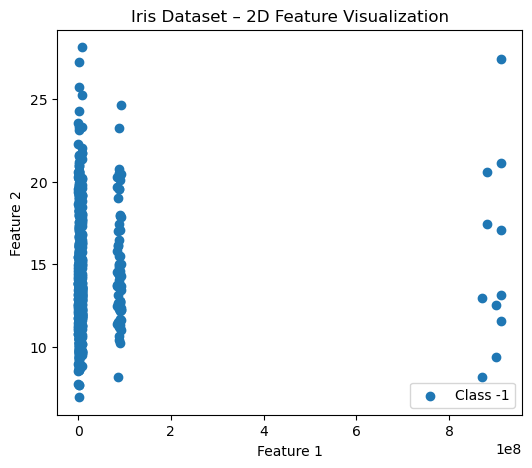

In [ ]:
# Select only first two features for visualization
X_vis = X[:, :2]

# Create scatter plot
plt.figure(figsize=(6, 5))
for label in np.unique(y):
    plt.scatter(
        X_vis[y == label, 0],              # Feature 1
        X_vis[y == label, 1],              # Feature 2
        label=f"Class {label}"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Iris Dataset – 2D Feature Visualization")
plt.legend()
plt.show()
